In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
data=data.drop(['CarName','car_ID'],axis=1)
data=pd.get_dummies(data,drop_first=True)

In [4]:
x=data.drop('price',axis=1)
y=data['price']

In [5]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(np.array(y).reshape(-1,1))
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
sgd_model=SGDRegressor(max_iter=1000,tol=1e-3)

In [8]:
sgd_model.fit(x_train,y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [9]:
y_pred=sgd_model.predict(x_test)

In [10]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [13]:
print('Name:Harish Kumar P')
print('Reg. No:25006070')
print(f"Mean Squared Error:{mse}")
print(f"R-squared Score:{r2}")
print(f"Mean Absolute Error:{mae}")

Name:Harish Kumar P
Reg. No:25006070
Mean Squared Error:0.21309757462164958
R-squared Score:0.8285630791890304
Mean Absolute Error:0.3149385873560561


In [14]:
print("\nModel Coefficients:")
print("Coefficients:",sgd_model.coef_)
print("Intercept:",sgd_model.intercept_)


Model Coefficients:
Coefficients: [ 0.03344952  0.10530993  0.01123524  0.17337426  0.02024939  0.16916524
  0.28338156 -0.02015472 -0.08112903  0.00334864  0.10710012  0.03575879
 -0.03799147 -0.04729243 -0.02042196  0.0190771   0.01636648 -0.02332492
 -0.08975208 -0.01655782 -0.0961289  -0.03163576  0.06283952  0.21575848
  0.01277304 -0.09927449  0.07558162 -0.01608396  0.00351873  0.00967206
 -0.03257668 -0.14221847 -0.07594801  0.00090251 -0.02628393  0.00967206
 -0.00434763 -0.01316702  0.02042196 -0.01840335 -0.03422256 -0.04068099
 -0.01698288]
Intercept: [-0.01289652]


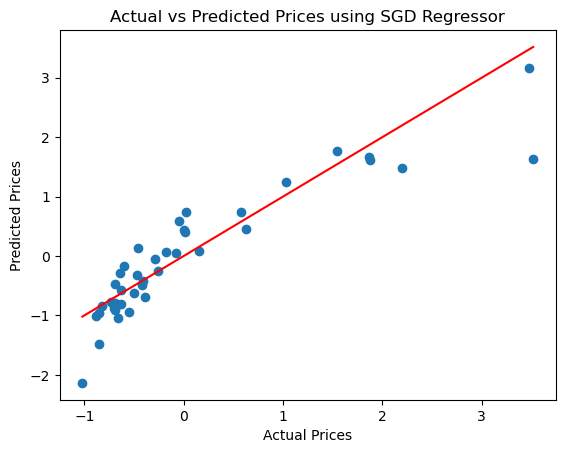

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.show()